<a href="https://colab.research.google.com/github/Msamuelsons/classificao-estrela/blob/main/star_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

try:
  df = pd.read_csv('/content/6 class csv.csv')
  print('Dataset Carregado')
  df.head()
except FileNotFoundError:
  print('Arquivo não encontrado')
except pd.errors.EmptyDataError:
  print('Arquivo de dados vazio')
except pd.errors.ParserError:
    print("Erro ao analisar o arquivo.")


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [2]:
# verificando valores ausentes
df.isnull().sum() / df.shape[0] # em porcentagem

Temperature (K)           0.0
Luminosity(L/Lo)          0.0
Radius(R/Ro)              0.0
Absolute magnitude(Mv)    0.0
Star type                 0.0
Star color                0.0
Spectral Class            0.0
dtype: float64

<ipython-input-94-6ec124547f8f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


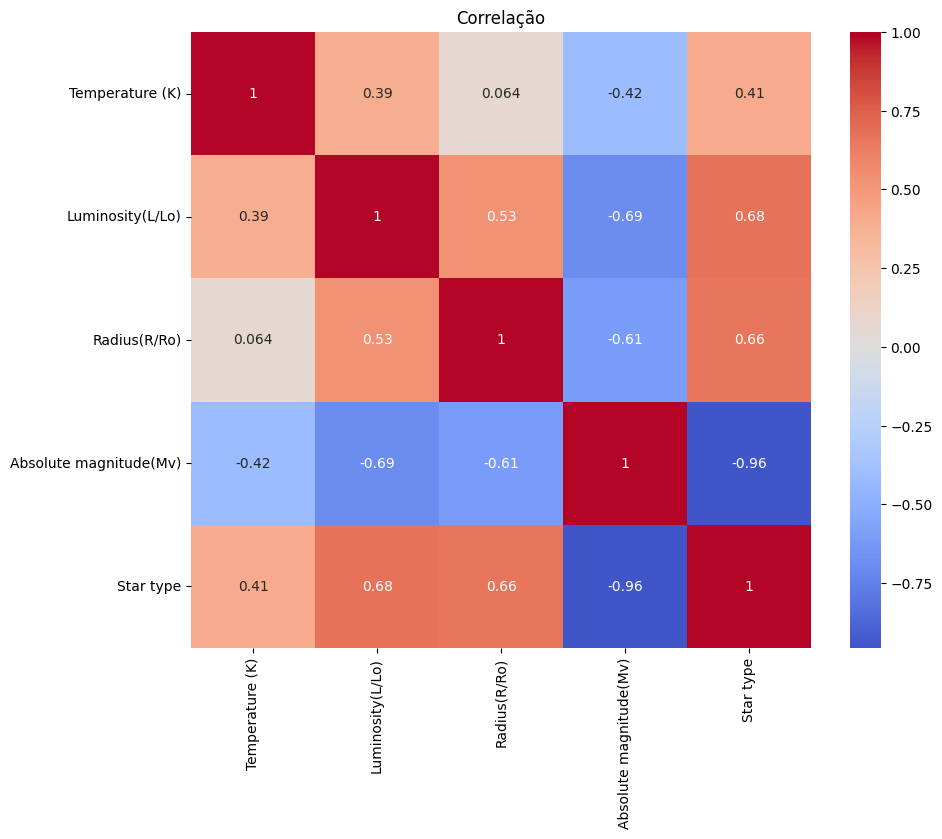

In [94]:
# Coeficiente de correlação de Pearson
#https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlação')
plt.show()


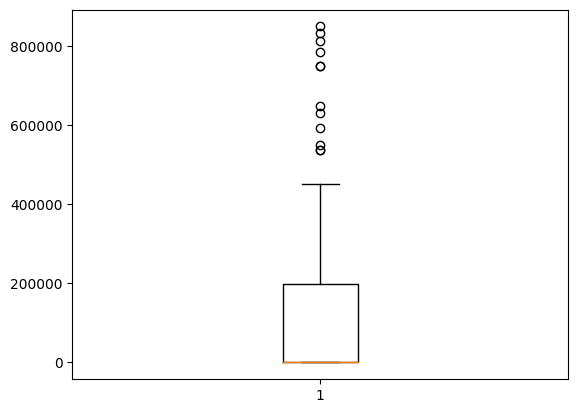

In [96]:
# verificando outlier
plt.boxplot(df['Luminosity(L/Lo)']); # coluna que apresenta maior outlier

In [97]:
Q1 = df['Luminosity(L/Lo)'].quantile(0.25)
Q3 = df['Luminosity(L/Lo)'].quantile(0.75)

IQR = Q3 - Q1

inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

print(f'Limite supeior: {superior}')
print(f'Limite inferior: {inferior}')

Limite supeior: 495124.998702875
Limite inferior: -297074.997838125


In [3]:
# Separando valores x e y
x = df.iloc[:, :6]
y = df.iloc[:, 6:]

In [4]:
# verificação de classes target em y
# possui 7 classes target [M, B, O, A, F, K, G]
y.value_counts()

Spectral Class
M                 111
B                  46
O                  40
A                  19
F                  17
K                   6
G                   1
dtype: int64

In [5]:
# tranformando y em
y_encoded = pd.get_dummies(y)

In [6]:
x_encode = pd.get_dummies(x, columns=['Star color'])
x_encode.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
# normalizando preditores
from sklearn.preprocessing import MinMaxScaler
normalizado = MinMaxScaler(feature_range=(0, 1))
X_normalizado = normalizado.fit_transform(x_encode)

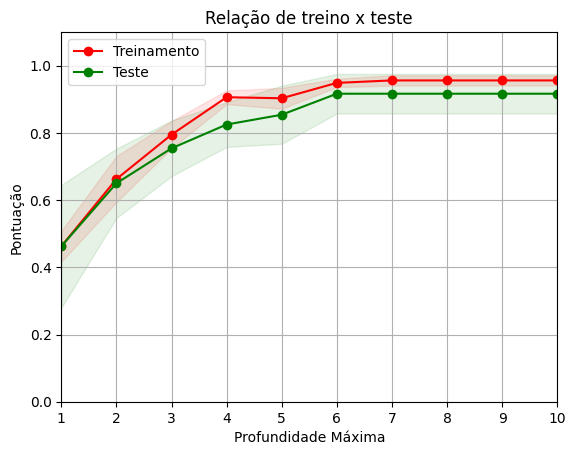

0.9166666666666667


In [105]:
# Decision Tree
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=8, max_depth=6, min_samples_split=10, criterion='entropy')

resultado_decision_tree = cross_val_score(tree, X_normalizado, y_encoded, cv=5)
param_range = np.arange(1, 11)

# Calculando curvas de validação
train_scores, test_scores = validation_curve(tree, X_normalizado, y_encoded, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy")

# Calculando a média e o desvio padrão das pontuações de treinamento e teste
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando o gráfico de validação
plt.figure()
plt.title("Relação de treino x teste")
plt.xlabel("Profundidade Máxima")
plt.ylabel("Pontuação")
plt.ylim(0.0, 1.1)
plt.xlim(1, 10)
plt.grid()
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Teste")
plt.legend(loc="best")
plt.show()

print(resultado_decision_tree.mean())

In [9]:
# Naive bayes
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y.values.ravel())

naive = GaussianNB(var_smoothing=1e-4)

stratified_k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

resultado_naive = cross_val_score(naive, X_normalizado, y_label_encoder, cv=stratified_k_fold)

print(resultado_naive.mean())


0.9041666666666666


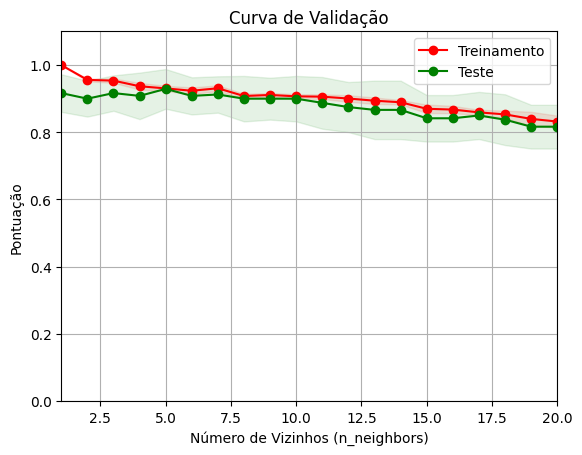

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=4)

# Definindo intervalo de valores para n_neighbors
param_range = np.arange(1, 21)

# Calculando curvas de validação
train_scores, test_scores = validation_curve(knn, X_normalizado, y_label_encoder, param_name="n_neighbors", param_range=param_range, cv=stratified_k_fold, scoring="accuracy")

# Calculando a média e o desvio padrão das pontuações de treinamento e teste
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando o gráfico de validação
plt.figure()
plt.title("Curva de Validação")
plt.xlabel("Número de Vizinhos (n_neighbors)")
plt.ylabel("Pontuação")
plt.ylim(0.0, 1.1)
plt.xlim(1, 20)
plt.grid()
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Teste")
plt.legend(loc="best")
plt.show()


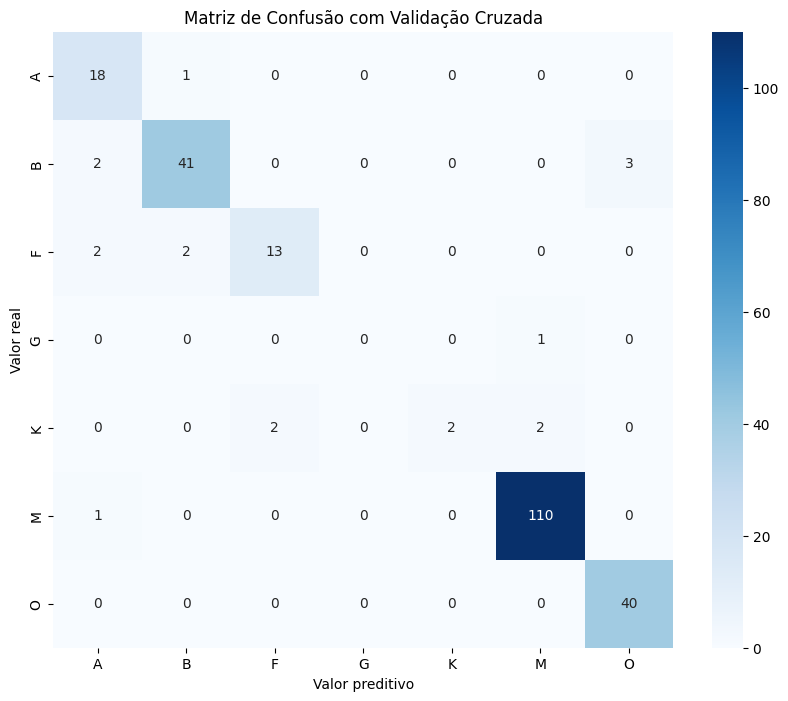

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Criando o modelo KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=4)

# Realizando a validação cruzada para obter previsões
y_pred = cross_val_predict(knn, X_normalizado, y_label_encoder, cv=stratified_k_fold)

# Criando a matriz de confusão
cm = confusion_matrix(y_label_encoder, y_pred)

# Plotando a matriz de confusão usando a biblioteca seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Valor preditivo")
plt.ylabel("Valor real")
plt.title("Matriz de Confusão com Validação Cruzada")
plt.show()


In [56]:
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

modelo = LogisticRegression(penalty='l2', solver='liblinear')

resultado = cross_val_score(modelo, X_normalizado, y_label_encoder, cv=kfold)

print(resultado.mean())

0.8541666666666666


In [87]:
# Gradient Boosting
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

gradient = GradientBoostingClassifier(n_estimators=100, random_state=42)
resultado_gradient = cross_val_score(gradient, X_normalizado, y_label_encoder, cv=kfold, n_jobs=-1)
print(resultado_gradient.mean())


0.9166666666666666
